In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0
Running on TPU  ['10.25.60.114:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.25.60.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.25.60.114:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


### Imports

In [3]:
import csv
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error 

### Load Data

In [4]:
data = pd.read_csv('/content/drive/My Drive/facial-keypoints-detection/training.csv')
data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [5]:
# Check if any values are empty per column
data.count()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [6]:
data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [7]:
data.fillna(method='ffill', inplace=True)

In [8]:
data.isnull().any().value_counts()

False    31
dtype: int64

### Create X Features List (Pixel Values)

In [9]:
imgPixels = []

for row in range(len(data.index)):
    pixels = data['Image'][row].split()
    # Filter out empty fields and replace with 0
    pixels = ['0' if x == '' else x for x in pixels]
    imgPixels.append(pixels)
    
X = np.array(imgPixels, dtype='float')
X.shape

(7049, 9216)

### Create y Labels List (Locations)

In [10]:
locations = []

for row in range(len(data.index)):
    # Filter out empty fields and replace with large -999 value to indicate no location coordinate
    locs = [data.iloc[row][x] for x in range(30)]
#     locs = [data.iloc[row][x] if np.isnan(data.iloc[row][x]) == False else -999 for x in range(30)]
    locations.append(locs)
    
Y = np.array(locations)
Y.shape

(7049, 30)

In [11]:
Y[1:,1:]

array([[34.9700766 , 29.9492766 , 33.44871489, ..., 70.26655319,
        45.46791489, 85.48017021],
       [34.90964211, 30.90378947, 34.90964211, ..., 70.19178947,
        47.27494737, 78.65936842],
       [37.26177391, 32.02309565, 37.26177391, ..., 70.09168696,
        51.56118261, 78.26838261],
       ...,
       [36.84522146, 31.66641951, 39.68504195, ..., 75.96359236,
        49.46257171, 78.11712   ],
       [39.85366588, 30.54328471, 40.77233882, ..., 75.96359236,
        50.06518588, 79.58644706],
       [43.42450963, 31.09605926, 39.52860444, ..., 75.96359236,
        45.90048   , 82.7730963 ]])

### Pixel Values DataFrame

In [12]:
pixelDF = pd.DataFrame(data=X)
pixelDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190,9191,9192,9193,9194,9195,9196,9197,9198,9199,9200,9201,9202,9203,9204,9205,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238.0,236.0,237.0,238.0,240.0,240.0,239.0,241.0,241.0,243.0,240.0,239.0,231.0,212.0,190.0,173.0,148.0,122.0,104.0,92.0,79.0,73.0,74.0,73.0,73.0,74.0,81.0,74.0,60.0,64.0,75.0,86.0,93.0,102.0,100.0,105.0,109.0,114.0,121.0,127.0,...,130.0,131.0,133.0,135.0,124.0,126.0,133.0,136.0,146.0,143.0,136.0,132.0,127.0,124.0,119.0,110.0,104.0,112.0,119.0,78.0,20.0,17.0,19.0,20.0,23.0,26.0,31.0,30.0,30.0,32.0,33.0,29.0,30.0,34.0,39.0,49.0,62.0,70.0,75.0,90.0
1,219.0,215.0,204.0,196.0,204.0,211.0,212.0,200.0,180.0,168.0,178.0,196.0,194.0,196.0,203.0,209.0,199.0,192.0,197.0,201.0,207.0,215.0,199.0,190.0,182.0,180.0,183.0,190.0,190.0,176.0,175.0,175.0,170.0,158.0,162.0,170.0,150.0,133.0,133.0,128.0,...,93.0,90.0,92.0,93.0,99.0,99.0,100.0,100.0,98.0,97.0,87.0,31.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,144.0,142.0,159.0,180.0,188.0,188.0,184.0,180.0,167.0,132.0,84.0,59.0,54.0,57.0,62.0,61.0,55.0,54.0,56.0,50.0,60.0,78.0,85.0,86.0,88.0,89.0,90.0,90.0,88.0,89.0,91.0,94.0,95.0,98.0,99.0,101.0,104.0,107.0,109.0,105.0,...,69.0,76.0,80.0,82.0,84.0,86.0,87.0,88.0,96.0,101.0,103.0,106.0,109.0,114.0,111.0,105.0,99.0,87.0,62.0,33.0,43.0,68.0,81.0,92.0,90.0,70.0,47.0,41.0,54.0,62.0,64.0,60.0,56.0,61.0,70.0,69.0,71.0,78.0,78.0,77.0
3,193.0,192.0,193.0,194.0,194.0,194.0,193.0,192.0,168.0,111.0,50.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,16.0,19.0,17.0,13.0,13.0,16.0,22.0,25.0,31.0,34.0,27.0,15.0,19.0,16.0,19.0,17.0,13.0,...,33.0,39.0,55.0,83.0,113.0,132.0,145.0,142.0,139.0,140.0,141.0,135.0,140.0,144.0,147.0,153.0,162.0,166.0,171.0,177.0,184.0,169.0,111.0,57.0,18.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,147.0,148.0,160.0,196.0,215.0,214.0,216.0,217.0,219.0,220.0,206.0,188.0,166.0,104.0,88.0,81.0,77.0,71.0,63.0,58.0,58.0,52.0,58.0,62.0,59.0,60.0,55.0,51.0,57.0,67.0,71.0,82.0,87.0,90.0,92.0,99.0,106.0,113.0,122.0,126.0,...,59.0,57.0,75.0,89.0,87.0,66.0,56.0,68.0,86.0,99.0,101.0,101.0,102.0,104.0,105.0,106.0,105.0,107.0,108.0,108.0,106.0,104.0,58.0,19.0,23.0,20.0,17.0,28.0,34.0,34.0,33.0,34.0,37.0,37.0,43.0,46.0,83.0,140.0,170.0,176.0


In [13]:
# All the empty fields have been filled
pixelDF.count()

0       7049
1       7049
2       7049
3       7049
4       7049
        ... 
9211    7049
9212    7049
9213    7049
9214    7049
9215    7049
Length: 9216, dtype: int64

### Find Duplicate Rows Of Features

In [14]:
pixelDF_duplicates = pixelDF[pixelDF.duplicated()]
print(pixelDF_duplicates)

       0      1      2      3      4     ...   9211   9212   9213   9214   9215
1907    5.0   10.0   20.0   29.0   39.0  ...  199.0  193.0  188.0  183.0  177.0
2362  187.0  169.0  177.0  175.0  119.0  ...    5.0    4.0   19.0   51.0   86.0
2924  147.0  164.0  135.0   45.0   19.0  ...  232.0  232.0  232.0  231.0  232.0
2974  209.0  207.0  203.0  197.0  193.0  ...   38.0   43.0   30.0   23.0   19.0
2990   72.0   67.0   61.0   60.0   60.0  ...   79.0   78.0   82.0   78.0   75.0
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
7036  247.0  244.0  241.0  238.0  233.0  ...    0.0    1.0    4.0    8.0   11.0
7041  164.0  165.0  167.0  168.0  169.0  ...  184.0  181.0  180.0  181.0  185.0
7044   71.0   74.0   85.0  105.0  116.0  ...   84.0   80.0   66.0   55.0   48.0
7045   60.0   60.0   62.0   57.0   55.0  ...   20.0   20.0   21.0   22.0   24.0
7048   53.0   62.0   67.0   76.0   86.0  ...  164.0  160.0  158.0  158.0  159.0

[555 rows x 9216 columns]


In [15]:
pixelDF_duplicates

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190,9191,9192,9193,9194,9195,9196,9197,9198,9199,9200,9201,9202,9203,9204,9205,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
1907,5.0,10.0,20.0,29.0,39.0,48.0,61.0,73.0,94.0,112.0,120.0,123.0,127.0,124.0,122.0,123.0,122.0,123.0,123.0,120.0,123.0,126.0,124.0,125.0,127.0,125.0,128.0,132.0,134.0,134.0,138.0,141.0,144.0,147.0,147.0,144.0,151.0,154.0,152.0,155.0,...,143.0,145.0,140.0,130.0,142.0,146.0,163.0,167.0,136.0,142.0,175.0,202.0,205.0,205.0,219.0,255.0,196.0,53.0,83.0,178.0,224.0,226.0,223.0,224.0,223.0,222.0,221.0,221.0,220.0,219.0,217.0,214.0,211.0,207.0,205.0,199.0,193.0,188.0,183.0,177.0
2362,187.0,169.0,177.0,175.0,119.0,46.0,18.0,29.0,50.0,44.0,38.0,65.0,73.0,63.0,60.0,87.0,155.0,227.0,222.0,219.0,222.0,228.0,233.0,236.0,237.0,236.0,236.0,237.0,242.0,244.0,245.0,245.0,246.0,247.0,247.0,248.0,248.0,250.0,251.0,251.0,...,223.0,219.0,213.0,208.0,204.0,201.0,199.0,198.0,210.0,216.0,212.0,206.0,196.0,185.0,172.0,164.0,160.0,159.0,150.0,113.0,68.0,93.0,116.0,48.0,23.0,29.0,37.0,34.0,29.0,32.0,34.0,45.0,50.0,30.0,16.0,5.0,4.0,19.0,51.0,86.0
2924,147.0,164.0,135.0,45.0,19.0,13.0,5.0,9.0,12.0,14.0,21.0,22.0,13.0,24.0,50.0,58.0,62.0,67.0,72.0,89.0,96.0,106.0,122.0,130.0,139.0,155.0,163.0,159.0,164.0,175.0,187.0,189.0,190.0,194.0,198.0,199.0,200.0,194.0,191.0,194.0,...,177.0,175.0,176.0,173.0,169.0,167.0,161.0,152.0,140.0,137.0,139.0,126.0,115.0,104.0,105.0,113.0,123.0,129.0,129.0,73.0,45.0,159.0,226.0,228.0,226.0,219.0,222.0,224.0,225.0,227.0,229.0,230.0,230.0,229.0,232.0,232.0,232.0,232.0,231.0,232.0
2974,209.0,207.0,203.0,197.0,193.0,192.0,196.0,200.0,205.0,211.0,216.0,214.0,207.0,194.0,163.0,130.0,91.0,65.0,55.0,66.0,78.0,86.0,81.0,78.0,76.0,82.0,87.0,90.0,96.0,102.0,106.0,108.0,108.0,109.0,111.0,113.0,116.0,117.0,117.0,119.0,...,116.0,115.0,114.0,113.0,111.0,110.0,109.0,107.0,106.0,104.0,98.0,93.0,89.0,88.0,88.0,89.0,86.0,83.0,79.0,75.0,71.0,67.0,63.0,57.0,61.0,67.0,75.0,79.0,80.0,74.0,42.0,7.0,11.0,14.0,18.0,38.0,43.0,30.0,23.0,19.0
2990,72.0,67.0,61.0,60.0,60.0,61.0,63.0,67.0,74.0,82.0,90.0,100.0,107.0,113.0,117.0,119.0,129.0,136.0,141.0,140.0,137.0,135.0,135.0,138.0,138.0,137.0,134.0,136.0,141.0,141.0,141.0,142.0,142.0,142.0,142.0,142.0,142.0,143.0,143.0,144.0,...,128.0,125.0,122.0,120.0,121.0,120.0,119.0,116.0,113.0,111.0,104.0,93.0,93.0,93.0,91.0,91.0,92.0,93.0,95.0,98.0,100.0,102.0,104.0,104.0,101.0,121.0,138.0,152.0,147.0,135.0,120.0,109.0,103.0,95.0,88.0,79.0,78.0,82.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,247.0,244.0,241.0,238.0,233.0,227.0,218.0,200.0,185.0,171.0,157.0,146.0,135.0,122.0,106.0,96.0,90.0,90.0,103.0,115.0,123.0,137.0,150.0,162.0,172.0,181.0,189.0,199.0,205.0,213.0,222.0,223.0,223.0,223.0,221.0,216.0,211.0,206.0,200.0,197.0,...,133.0,126.0,116.0,106.0,94.0,80.0,68.0,64.0,58.0,34.0,14.0,3.0,1.0,2.0,1.0,0.0,0.0,3.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,7.0,9.0,9.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,8.0,11.0
7041,164.0,165.0,167.0,168.0,169.0,170.0,172.0,171.0,170.0,171.0,173.0,165.0,172.0,175.0,157.0,104.0,37.0,18.0,18.0,29.0,47.0,72.0,91.0,94.0,96.0,102.0,104.0,111.0,119.0,126.0,132.0,135.0,140.0,144.0,148.0,152.0,155.0,156.0,160.0,163.0,...,159.0,160.0,155.0,140.0,126.0,116.0,109.0,101.0,91.0,91.0,104.0,108.0,93.0,66.0,58.0,52.0,45.0,38.0,40.0,42.0,49.0,63.0,81.0,102.0,122.0,137.0,148.0,154.0,158.0,169.0,171.0,176.0,180.0,183.0,184.0,184.0,181.0,180.0,181.0,185.0
7044,71.0,74.0,85.0,105.0,116.0,128.0,139.0,150.0,170.0,187.0,201.0,209.0,218.0,219.0,212.0,198.0,184.0,181.0,185.0,188.0,193.0,196.0,199.0,202.0,206.0,208.0,21

In [16]:
# List of duplicate rows
list(pixelDF_duplicates.index)

[1907,
 2362,
 2924,
 2974,
 2990,
 2994,
 2997,
 3007,
 3021,
 3029,
 3041,
 3077,
 3081,
 3095,
 3099,
 3123,
 3133,
 3141,
 3166,
 3187,
 3257,
 3258,
 3269,
 3306,
 3316,
 3317,
 3521,
 3531,
 3552,
 3564,
 3565,
 3572,
 3584,
 3585,
 3607,
 3618,
 3626,
 3627,
 3642,
 3652,
 3657,
 3668,
 3672,
 3677,
 3683,
 3686,
 3722,
 3724,
 3732,
 3740,
 3741,
 3762,
 3771,
 3786,
 3790,
 3825,
 3841,
 3852,
 3889,
 3890,
 3902,
 3935,
 3936,
 3937,
 3993,
 4002,
 4007,
 4008,
 4014,
 4050,
 4084,
 4087,
 4099,
 4112,
 4122,
 4129,
 4133,
 4154,
 4170,
 4171,
 4203,
 4204,
 4223,
 4231,
 4235,
 4244,
 4253,
 4258,
 4266,
 4267,
 4277,
 4280,
 4296,
 4301,
 4306,
 4316,
 4334,
 4351,
 4355,
 4360,
 4381,
 4411,
 4412,
 4449,
 4458,
 4465,
 4469,
 4488,
 4560,
 4562,
 4563,
 4574,
 4583,
 4585,
 4588,
 4594,
 4602,
 4605,
 4614,
 4624,
 4660,
 4676,
 4684,
 4686,
 4687,
 4688,
 4689,
 4691,
 4699,
 4702,
 4718,
 4733,
 4736,
 4742,
 4750,
 4753,
 4757,
 4762,
 4764,
 4768,
 4780,
 4789,
 4801,

### Location Coordinates DataFrame

In [17]:
locsDF = pd.DataFrame(data=Y)
locsDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [18]:
# All empty fields have been filled up
locsDF.count()

0     7049
1     7049
2     7049
3     7049
4     7049
5     7049
6     7049
7     7049
8     7049
9     7049
10    7049
11    7049
12    7049
13    7049
14    7049
15    7049
16    7049
17    7049
18    7049
19    7049
20    7049
21    7049
22    7049
23    7049
24    7049
25    7049
26    7049
27    7049
28    7049
29    7049
dtype: int64

### Filter Out Duplicate Rows in X and Y

In [19]:
X = np.delete(X, list(pixelDF_duplicates.index), axis=0)
X.shape

(6494, 9216)

In [20]:
Y = np.delete(Y, list(pixelDF_duplicates.index), axis=0)
Y.shape

(6494, 30)

### Create Train, Dev, and Test Data

In [21]:
train_data, train_labels = X[:2747], Y[:2747]
dev_data, dev_labels = X[2747:5494], Y[2747:5494]
test_data, test_labels = X[5494:], Y[5494:]

print("Train Data: {0}, Train Labels: {1}".format(train_data.shape, train_labels.shape))
print("Dev Data: {0}, Dev Labels: {1}".format(dev_data.shape, dev_labels.shape))
print("Test Data: {0}, Test Labels: {1}".format(test_data.shape, test_labels.shape))

Train Data: (2747, 9216), Train Labels: (2747, 30)
Dev Data: (2747, 9216), Dev Labels: (2747, 30)
Test Data: (1000, 9216), Test Labels: (1000, 30)


### Display the first image in train data with its keypoints

In [22]:
locx = [train_labels[0][x] for x in range(0, train_labels.shape[1], 2)]
locy = [train_labels[0][y] for y in range(1, train_labels.shape[1], 2)]

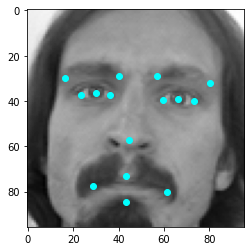

In [23]:
plt.imshow(train_data[0].reshape(96,96), cmap='gray')
plt.scatter(locx, locy, color='cyan', marker='o')
plt.show()

### Build a DecisionTreeRegressor

In [23]:
dtr = DecisionTreeRegressor()
dtr.fit(train_data, train_labels)
dtr_predictions = dtr.predict(dev_data)
print(dtr_predictions.shape)

(2747, 30)


In [24]:
dtr_predictions[1]

array([71.47575652, 37.26177391, 26.7072    , 37.26177391, 64.76076522,
       38.00790261, 78.32264348, 38.0609113 , 31.55728696, 37.26177391,
       18.87276522, 38.75411478, 56.83366957, 33.11657739, 85.27972174,
       30.54653217, 36.40737391, 33.15798261, 11.78462609, 31.66572522,
       50.21050435, 70.09168696, 71.47575652, 73.45001739, 24.84146087,
       74.56862609, 48.3456    , 75.68806957, 48.71874783, 93.22267826])

In [25]:
dev_labels[1]

array([70.311984  , 34.947     , 31.97748   , 38.477808  , 59.25534694,
       36.06514286, 73.94269388, 34.62465306, 37.47853061, 39.39804082,
       22.05681633, 40.33012245, 53.29978747, 29.98765747, 80.94778747,
       27.97753502, 38.77929767, 33.30259624, 14.79888951, 35.98275951,
       55.684344  , 64.20228   , 72.60043255, 71.86204134, 34.23275908,
       77.3394291 , 51.59945296, 75.96359236, 56.188728  , 78.82992   ])

### Evaluate The Model

In [26]:
dtr_mse = mean_squared_error(dev_labels, dtr_predictions)
dtr_rmse = np.sqrt(dtr_mse)

print("RMSE: {0}".format(dtr_rmse))

RMSE: 4.843434263686793


In [27]:
pred1x = [dtr_predictions[1][x] for x in range(0, dtr_predictions.shape[1], 2)]
pred1y = [dtr_predictions[1][y] for y in range(1, dtr_predictions.shape[1], 2)]
dev_label1x = [dev_labels[1][x] for x in range(0, dev_labels.shape[1], 2)]
dev_label1y = [dev_labels[1][y] for y in range(1, dev_labels.shape[1], 2)]

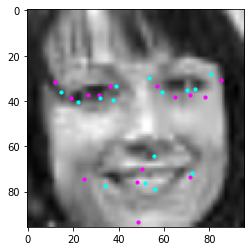

In [58]:
plt.imshow(dev_data[1].reshape(96,96), cmap='gray')
plt.scatter(pred1x, pred1y, color='magenta', marker='o', s=10)
plt.scatter(dev_label1x, dev_label1y, color='cyan', marker='o', s=10)
plt.show()

### Display 50 Images

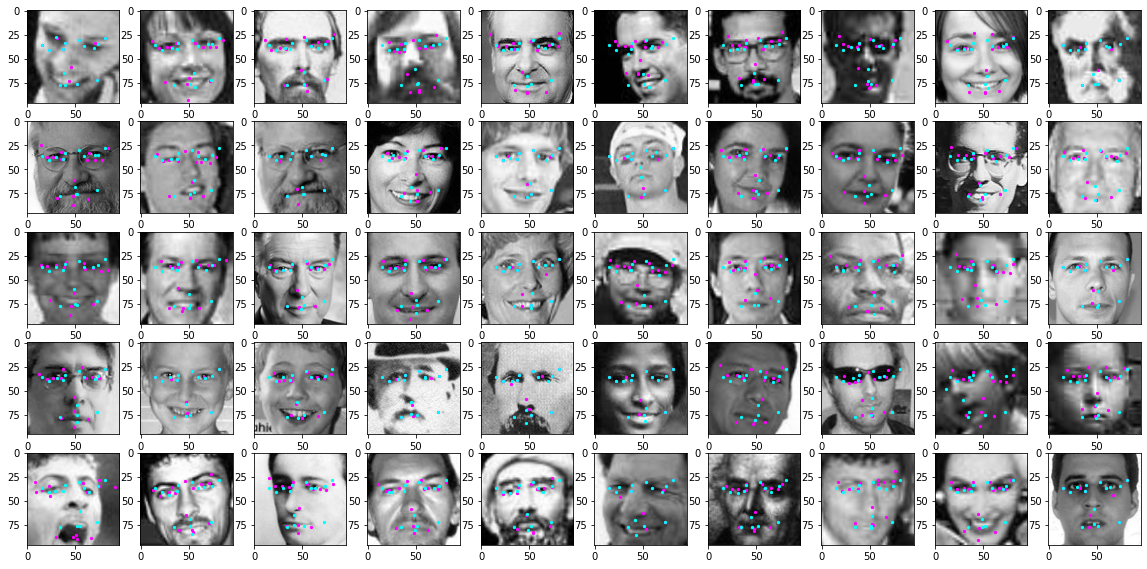

In [57]:
plt.figure(figsize=(20,20))
plt.rc('image', cmap='gray')

for i in range(50):
  plt.subplot(10, 10, i+1)
  square_dims = int(np.sqrt(X.shape[1]))
  face = dev_data[i].reshape((square_dims, square_dims))

  predx = [dtr_predictions[i][x] for x in range(0, dtr_predictions.shape[1], 2)]
  predy = [dtr_predictions[i][y] for y in range(1, dtr_predictions.shape[1], 2)]
  dev_labelx = [dev_labels[i][x] for x in range(0, dev_labels.shape[1], 2)]
  dev_labely = [dev_labels[i][y] for y in range(1, dev_labels.shape[1], 2)]

  plt.scatter(predx, predy, color='magenta', marker='o', s=5)
  plt.scatter(dev_labelx, dev_labely, color='cyan', marker='o', s=5)

  plt.imshow(face)

### Evaluate On Test Data

In [59]:
dtr_predictions_test = dtr.predict(test_data)
dtr_mse_test = mean_squared_error(test_labels, dtr_predictions_test)
dtr_rmse_test = np.sqrt(dtr_mse_test)

print("RMSE: {0}".format(dtr_rmse_test))

RMSE: 4.797870287286683


Image: 0, Min Threshold: 54.5, Max Threshold: 109.0
Image: 1, Min Threshold: 44.5, Max Threshold: 89.0
Image: 2, Min Threshold: 81.0, Max Threshold: 162.0
Image: 3, Min Threshold: 70.5, Max Threshold: 141.0
Image: 4, Min Threshold: 71.0, Max Threshold: 142.0
Image: 5, Min Threshold: 46.0, Max Threshold: 92.0
Image: 6, Min Threshold: 40.5, Max Threshold: 81.0
Image: 7, Min Threshold: 57.0, Max Threshold: 114.0
Image: 8, Min Threshold: 54.5, Max Threshold: 109.0
Image: 9, Min Threshold: 87.0, Max Threshold: 174.0
Image: 10, Min Threshold: 59.0, Max Threshold: 118.0
Image: 11, Min Threshold: 43.5, Max Threshold: 87.0
Image: 12, Min Threshold: 64.0, Max Threshold: 128.0
Image: 13, Min Threshold: 47.0, Max Threshold: 94.0
Image: 14, Min Threshold: 69.5, Max Threshold: 139.0
Image: 15, Min Threshold: 71.5, Max Threshold: 143.0
Image: 16, Min Threshold: 40.0, Max Threshold: 80.0
Image: 17, Min Threshold: 48.5, Max Threshold: 97.0
Image: 18, Min Threshold: 66.0, Max Threshold: 132.0
Image: 19,

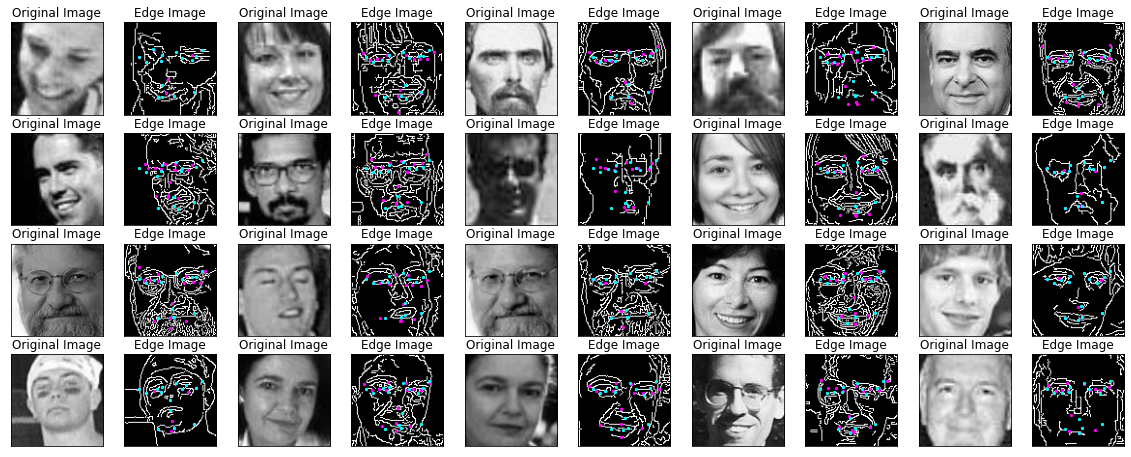

In [127]:
plt.figure(figsize=(20,20))
plt.rc('image', cmap='gray')
row = 0
iterations = 0

for i in range (20):
  # image = cv2.GaussianBlur(dev_data[i].reshape((96,96)).astype(np.uint8), (5,5), 0)
  image = dev_data[i].reshape((96,96)).astype(np.uint8)

  # Automatic Image Thresholding (Otsu's method)
  max_val, im_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  min_val = 0.5 * max_val

  print("Image: {0}, Min Threshold: {1}, Max Threshold: {2}".format(i, min_val, max_val))

  edges = cv2.Canny(image, min_val, max_val)
  
  plt.subplot(10, 10, row + 1 + iterations),plt.imshow(dev_data[i].reshape((96,96)),cmap = 'gray')
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(10, 10, row + 2 + iterations),plt.imshow(edges,cmap = 'gray')
  plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

  predx = [dtr_predictions[i][x] for x in range(0, dtr_predictions.shape[1], 2)]
  predy = [dtr_predictions[i][y] for y in range(1, dtr_predictions.shape[1], 2)]
  dev_labelx = [dev_labels[i][x] for x in range(0, dev_labels.shape[1], 2)]
  dev_labely = [dev_labels[i][y] for y in range(1, dev_labels.shape[1], 2)]

  plt.scatter(predx, predy, color='magenta', marker='o', s=5)
  plt.scatter(dev_labelx, dev_labely, color='cyan', marker='o', s=5)

  row += 1
  iterations += 1

  plt.show()

Image: 0, Min Threshold: 55.0, Max Threshold: 110.0
Image: 1, Min Threshold: 44.5, Max Threshold: 89.0
Image: 2, Min Threshold: 81.5, Max Threshold: 163.0
Image: 3, Min Threshold: 70.5, Max Threshold: 141.0
Image: 4, Min Threshold: 71.5, Max Threshold: 143.0
Image: 5, Min Threshold: 45.5, Max Threshold: 91.0
Image: 6, Min Threshold: 41.5, Max Threshold: 83.0
Image: 7, Min Threshold: 57.0, Max Threshold: 114.0
Image: 8, Min Threshold: 54.5, Max Threshold: 109.0
Image: 9, Min Threshold: 87.0, Max Threshold: 174.0
Image: 10, Min Threshold: 60.0, Max Threshold: 120.0
Image: 11, Min Threshold: 43.5, Max Threshold: 87.0
Image: 12, Min Threshold: 64.5, Max Threshold: 129.0
Image: 13, Min Threshold: 46.5, Max Threshold: 93.0
Image: 14, Min Threshold: 70.5, Max Threshold: 141.0
Image: 15, Min Threshold: 71.5, Max Threshold: 143.0
Image: 16, Min Threshold: 39.5, Max Threshold: 79.0
Image: 17, Min Threshold: 49.0, Max Threshold: 98.0
Image: 18, Min Threshold: 65.0, Max Threshold: 130.0
Image: 19,

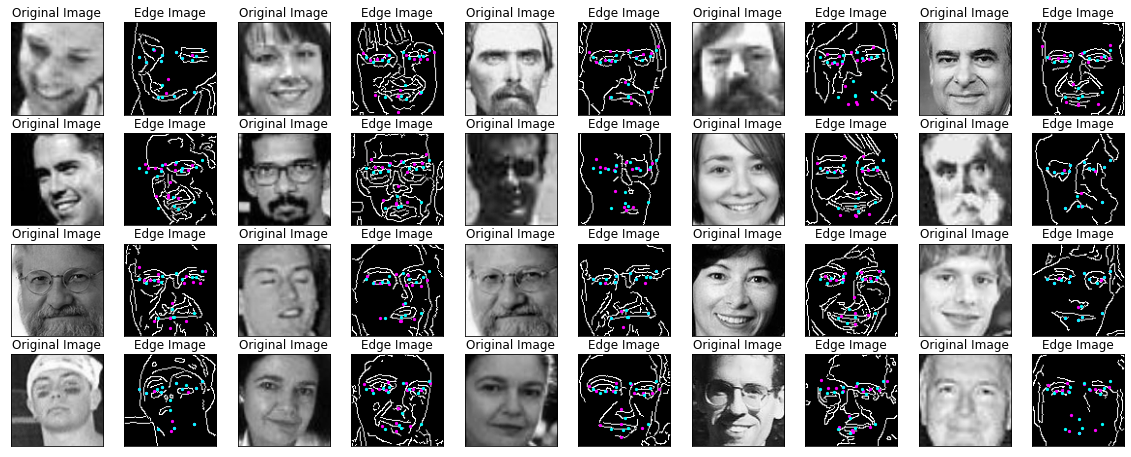

In [128]:
plt.figure(figsize=(20,20))
plt.rc('image', cmap='gray')
row = 0
iterations = 0

for i in range (20):
  image = cv2.GaussianBlur(dev_data[i].reshape((96,96)).astype(np.uint8), (5,5), 0)
  # image = dev_data[i].reshape((96,96)).astype(np.uint8)

  # Automatic Image Thresholding (Otsu's method)
  max_val, im_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  min_val = 0.5 * max_val

  print("Image: {0}, Min Threshold: {1}, Max Threshold: {2}".format(i, min_val, max_val))

  edges = cv2.Canny(image, min_val, max_val)
  
  plt.subplot(10, 10, row + 1 + iterations),plt.imshow(dev_data[i].reshape((96,96)),cmap = 'gray')
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(10, 10, row + 2 + iterations),plt.imshow(edges,cmap = 'gray')
  plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

  predx = [dtr_predictions[i][x] for x in range(0, dtr_predictions.shape[1], 2)]
  predy = [dtr_predictions[i][y] for y in range(1, dtr_predictions.shape[1], 2)]
  dev_labelx = [dev_labels[i][x] for x in range(0, dev_labels.shape[1], 2)]
  dev_labely = [dev_labels[i][y] for y in range(1, dev_labels.shape[1], 2)]

  plt.scatter(predx, predy, color='magenta', marker='o', s=5)
  plt.scatter(dev_labelx, dev_labely, color='cyan', marker='o', s=5)

  row += 1
  iterations += 1

  plt.show()

### Example Train Image Without GaussianBlur Filter

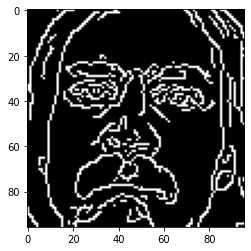

In [133]:
unfilteredImage = train_data[0].reshape((96,96)).astype(np.uint8)
unfiltered_max, unfilteredImage_threshold = cv2.threshold(unfilteredImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
unfiltered_min = 0.5 * unfiltered_max
unfilteredEdges = cv2.Canny(unfilteredImage, unfiltered_min, unfiltered_max)
plt.imshow(np.array(unfilteredEdges).reshape(96,96), cmap='gray')

### Example Train Image With GaussianBlur Filter

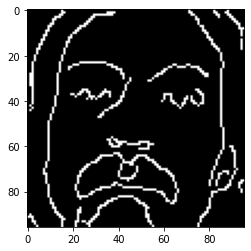

In [172]:
gaussImage = cv2.GaussianBlur(train_data[0].reshape((96,96)).astype(np.uint8), (5,5), 0)
max_gaussT, gaussImage_threshold = cv2.threshold(gaussImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
min_gaussT = 0.5 * max_gaussT
gaussEdges = cv2.Canny(gaussImage, min_gaussT, max_gaussT)
plt.imshow(np.array(gaussEdges).reshape(96,96), cmap='gray')

### Filter Train Data with GaussianBlur

In [157]:
blurred_train_data = []

for row in train_data:
  blurred_image = cv2.GaussianBlur(row.reshape((96,96)).astype(np.uint8), (5,5), 0)
  blurred_train_data.append(blurred_image.flatten())

blurred_train_data = np.array(blurred_train_data)

numpy.ndarray

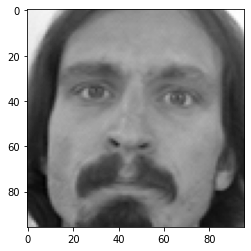

In [162]:
plt.imshow(train_data[0].reshape((96,96)), cmap='gray')

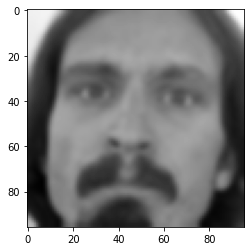

In [163]:
plt.imshow(blurred_train_data[0].reshape((96,96)), cmap='gray')

### Create a DecisionTreeRegressor for the Blurred Images

In [181]:
dtr_blurred = DecisionTreeRegressor()
dtr_blurred.fit(blurred_train_data, train_labels)
dtr_blurred_preds = dtr_blurred.predict(dev_data)
print(dtr_blurred_preds.shape)

(2747, 30)


In [182]:
dtr_blurred_mse = mean_squared_error(dev_labels, dtr_blurred_preds)
dtr_blurred_rmse = np.sqrt(dtr_blurred_mse)

print("RMSE: {0}".format(dtr_blurred_rmse))

RMSE: 5.148009321375111


### Create a DecisionTreeRegressor for the Edge Detected Blurred Images

In [176]:
blurred_edge_train_data = []

for row in train_data:
  blurred_im = cv2.GaussianBlur(row.reshape((96,96)).astype(np.uint8), (5,5), 0)
  max_blur_edge_val, blurEdgeImage_threshold = cv2.threshold(blurred_im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  min_blur_edge_val = 0.5 * max_blur_edge_val
  blurred_edges = cv2.Canny(blurred_im, min_blur_edge_val, max_blur_edge_val)
  blurred_edge_train_data.append(blurred_edges.flatten())

blurred_edge_train_data = np.array(blurred_edge_train_data)

In [179]:
dtr_blurred_edges = DecisionTreeRegressor()
dtr_blurred_edges.fit(blurred_edge_train_data, train_labels)
dtr_blurred_edges_preds = dtr_blurred_edges.predict(dev_data)
print(dtr_blurred_edges_preds.shape)

(2747, 30)


In [183]:
dtr_blurred_edges_mse = mean_squared_error(dev_labels, dtr_blurred_edges_preds)
dtr_blurred_edges_rmse = np.sqrt(dtr_blurred_edges_mse)

print("RMSE: {0}".format(dtr_blurred_edges_rmse))

RMSE: 7.474634323394746


In [184]:
dtr_blurred_edges_preds[0]

array([75.86112761, 35.8284441 , 29.64586342, 38.32260121, 65.84782037,
       37.99249218, 85.83775607, 36.37862581, 39.43909798, 38.57935268,
       20.98967108, 38.35927999, 55.24897959, 31.10673749, 85.49823875,
       24.76488678, 38.45904389, 34.80234834, 13.73038859, 29.87486721,
       44.80626223, 75.99273134, 84.76712315, 82.64243763, 37.12943794,
       83.24629561, 57.29158499, 90.92871104, 58.96896827, 94.71959726])

In [24]:
dev_labels[0]

array([69.83719024, 38.55067317, 29.75250732, 27.25411902, 59.25534694,
       36.06514286, 73.94269388, 34.62465306, 37.47853061, 39.39804082,
       22.05681633, 40.33012245, 53.29978747, 29.98765747, 80.94778747,
       27.97753502, 38.77929767, 33.30259624, 14.79888951, 35.98275951,
       38.49834146, 64.78777756, 72.60043255, 71.86204134, 34.23275908,
       77.3394291 , 51.59945296, 75.96359236, 38.86267317, 77.5419161 ])

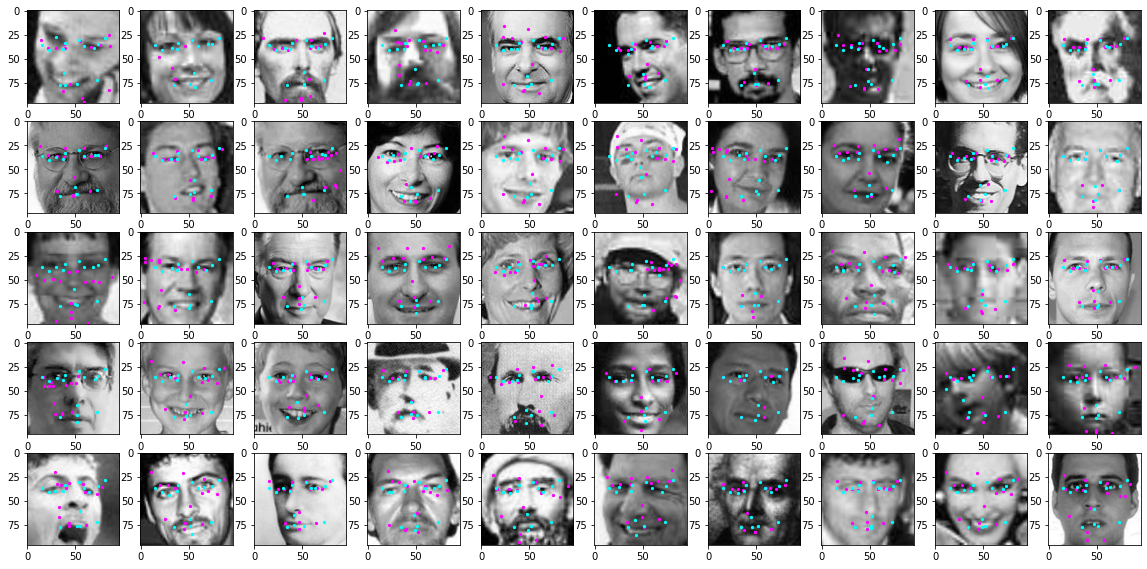

In [186]:
# NEED TO MODIFY TO BLURRED EDGE IMAGES
plt.figure(figsize=(20,20))
plt.rc('image', cmap='gray')

for i in range(50):
  plt.subplot(10, 10, i+1)
  square_dims = int(np.sqrt(X.shape[1]))
  face = dev_data[i].reshape((square_dims, square_dims))

  predx = [dtr_blurred_edges_preds[i][x] for x in range(0, dtr_blurred_edges_preds.shape[1], 2)]
  predy = [dtr_blurred_edges_preds[i][y] for y in range(1, dtr_blurred_edges_preds.shape[1], 2)]
  dev_labelx = [dev_labels[i][x] for x in range(0, dev_labels.shape[1], 2)]
  dev_labely = [dev_labels[i][y] for y in range(1, dev_labels.shape[1], 2)]

  plt.scatter(predx, predy, color='magenta', marker='o', s=5)
  plt.scatter(dev_labelx, dev_labely, color='cyan', marker='o', s=5)

  plt.imshow(face)

In [187]:
blurred_dev_data = []

for row in dev_data:
  blurred_dev_image = cv2.GaussianBlur(row.reshape((96,96)).astype(np.uint8), (5,5), 0)
  blurred_dev_data.append(blurred_dev_image.flatten())

blurred_dev_data = np.array(blurred_dev_data)
blurred_dev_data.shape

(2747, 9216)

In [189]:
dtr_blurred.fit(blurred_train_data, train_labels)
dtr_blurred_preds_dev = dtr_blurred.predict(blurred_dev_data)
print(dtr_blurred_preds_dev.shape)

(2747, 30)


In [190]:
dtr_blurred_mse_dev = mean_squared_error(dev_labels, dtr_blurred_preds_dev)
dtr_blurred_rmse_dev = np.sqrt(dtr_blurred_mse_dev)

print("RMSE: {0}".format(dtr_blurred_rmse_dev))

RMSE: 4.811066410069547


In [188]:
blurred_edge_dev_data = []

for row in dev_data:
  blurred_dev_im = cv2.GaussianBlur(row.reshape((96,96)).astype(np.uint8), (5,5), 0)
  dev_max_blur_edge_val, dev_blurEdgeImage_threshold = cv2.threshold(blurred_dev_im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  dev_min_blur_edge_val = 0.5 * dev_max_blur_edge_val
  dev_blurred_edges = cv2.Canny(blurred_dev_im, dev_min_blur_edge_val, dev_max_blur_edge_val)
  blurred_edge_dev_data.append(dev_blurred_edges.flatten())

blurred_edge_dev_data = np.array(blurred_edge_dev_data)
blurred_edge_dev_data.shape

(2747, 9216)

In [197]:
dtr_blurred_edges.fit(blurred_edge_train_data, train_labels)
dtr_blurred_edges_preds_dev = dtr_blurred_edges.predict(blurred_edge_dev_data)
print(dtr_blurred_edges_preds_dev.shape)

(2747, 30)


In [198]:
dtr_blurred_edges_mse_dev = mean_squared_error(dev_labels, dtr_blurred_edges_preds_dev)
dtr_blurred_edges_rmse_dev = np.sqrt(dtr_blurred_edges_mse_dev)

print("RMSE: {0}".format(dtr_blurred_edges_rmse_dev))

RMSE: 4.7177268486328074


In [26]:
rfr = RandomForestRegressor(max_depth=8, n_jobs=-1)
rfr.fit(train_data, train_labels)
rfr_preds = rfr.predict(dev_data)
rfr_preds.shape

(2747, 30)

In [27]:
rfr_mse = mean_squared_error(dev_labels, rfr_preds)
rfr_rmse = np.sqrt(rfr_mse)

print("RMSE: {0}".format(rfr_rmse))

RMSE: 2.9989804330157317
